In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [52]:
file_path=r"C:\projects\Capstone Project\Data\kidney_disease.csv"
df=pd.read_csv(file_path)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [53]:
df.drop(['id'],axis=1,inplace=True)

In [54]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [55]:
for col in ["pcv","wc","rc"]:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [56]:
for col in df.select_dtypes(include=['object']).columns:
    df.fillna(df[col].mode()[0],inplace=True)
for col in df.select_dtypes(include=['float64','int64']).columns:
    df.fillna(df[col].mean(),inplace=True)

C:\Users\qusai\AppData\Local\Temp\ipykernel_31080\97751793.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'normal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(df[col].mode()[0],inplace=True)


In [57]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [58]:
map={"yes":1,"no":0,
      "present":1,"notpresent":0,
      "abnormal":1,"normal":0,
      "good":1,"poor":0,
      "ckd":1,"notckd":0}

df=df.map(lambda x:map.get(str(x).strip().lower(),x) if isinstance(x,str)else x)

In [59]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,0.0,...,38.0,6000.0,0.0,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,0.0,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


<Axes: >

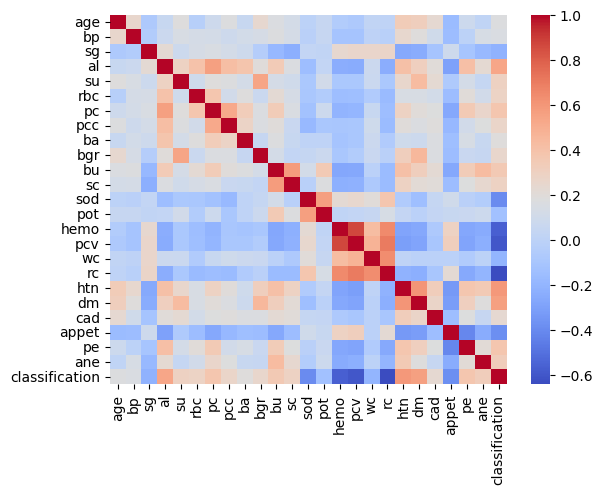

In [60]:
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')

In [71]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df_reduced = df.drop(columns=to_drop)
df_reduced.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,0.0,...,38.0,6000.0,0.0,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,0.0,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [72]:
x=df_reduced.drop(['classification'],axis=1)

x=StandardScaler().fit_transform(x)


In [73]:
pca=PCA(n_components=None)
x_pca=pca.fit_transform(x)

In [74]:
var=np.cumsum(pca.explained_variance_ratio_)


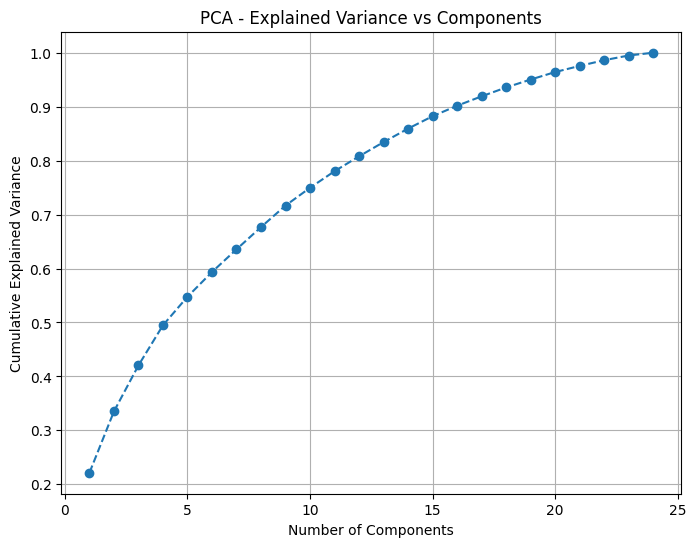

In [75]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(var)+1), var, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs Components")
plt.grid(True)
plt.show()


In [76]:
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(x)

In [77]:
x.shape,x_reduced.shape

((400, 24), (400, 19))

In [78]:
y=df_reduced["classification"]

x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.2,random_state=42)

ML Models Below
